# World Happiness Report - 9 Unique Visualizations  
**Team:** Data Optimists  
**Dataset:** Kaggle World Happiness Report 2021  
**Source:** https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021

## 1. Setup & Data Loading

In [148]:
"""
Module: world_happiness_report_visualizations
This notebook generates 9 unique visualizations
for the World Happiness Report 2021 dataset.
"""

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display

# Load data files
df = pd.read_csv('world-happiness-report-2021.csv')
historical = pd.read_csv('world-happiness-report.csv')

# Clean column names
df.columns = [x.lower().replace(' ', '_') for x in df.columns]
factors = ['logged_gdp_per_capita', 'social_support', 'healthy_life_expectancy',
           'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']

# Display the first few rows of the dataset
display(df.head())

# Display the first few rows of the historical dataset
display(historical.head())

,country_name,regional_indicator,ladder_score,standard_error_of_ladder_score,upperwhisker,lowerwhisker,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia,explained_by:_log_gdp_per_capita,explained_by:_social_support,explained_by:_healthy_life_expectancy,explained_by:_freedom_to_make_life_choices,explained_by:_generosity,explained_by:_perceptions_of_corruption,dystopia_+_residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


## Member 1: Global Comparisons

### 1. Happiness World Map

# World Happiness Report Expanded Visualizations
Generated programmatically from JSON definitions.

### 1. Global Happiness Choropleth
**Rationale:** A world-map choropleth highlights geographic patterns in happiness, revealing clusters of high and low well-being.
**Expected Insights:** High scores in Northern Europe; lower scores in low-income or conflict regions.

In [149]:
fig = px.choropleth(
    df, locations='country_name', locationmode='country names',
    color='ladder_score', hover_name='country_name',
    color_continuous_scale='RdYlGn',
    title='Global Happiness Scores (2021)'
)

# Increase the size of the figure
fig.update_layout(
    title_font_size=24,
    title_x=0.5,
    title_y=0.95,
    title_xanchor='center',
    title_yanchor='top',
    width=1200,
    height=800
)

fig.show()

### 2. Extremes of Happiness: Top vs Bottom 10
**Rationale:** Side-by-side bar comparison of best- and worst-performing countries.
**Expected Insights:** Stark score gaps prompting policy difference investigations.

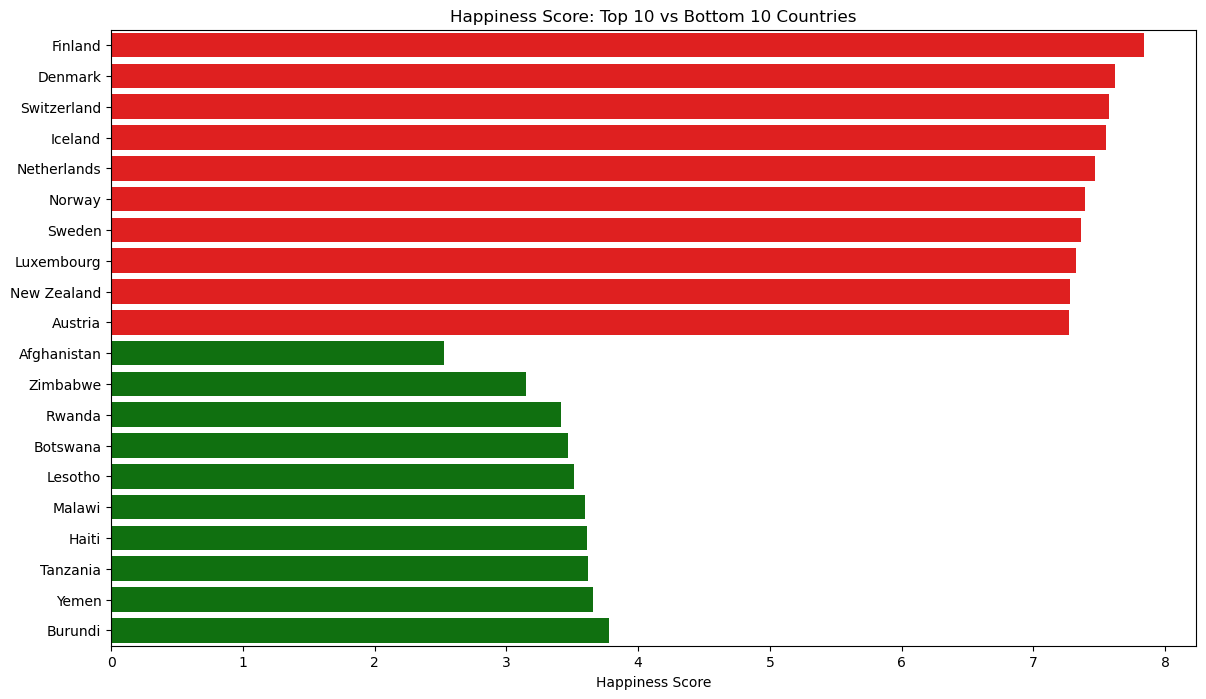

In [150]:
top10 = df.nlargest(10, 'ladder_score')
bottom10 = df.nsmallest(10, 'ladder_score')
comparison = pd.concat([top10, bottom10])

plt.figure(figsize=(14, 8))
sns.barplot(data=comparison, x='ladder_score', y='country_name',
            hue=comparison.index <= 9, palette=['green', 'red'], dodge=False)
plt.title('Happiness Score: Top 10 vs Bottom 10 Countries')
plt.xlabel('Happiness Score')
plt.ylabel('')
plt.legend([], [], frameon=False)
plt.show()

### 3. Scatter & Regression: Social Support vs Happiness
**Rationale:** Regression plot tests association between social support and happiness.
**Expected Insights:** Positive trend line, confirming social networks predict well-being.

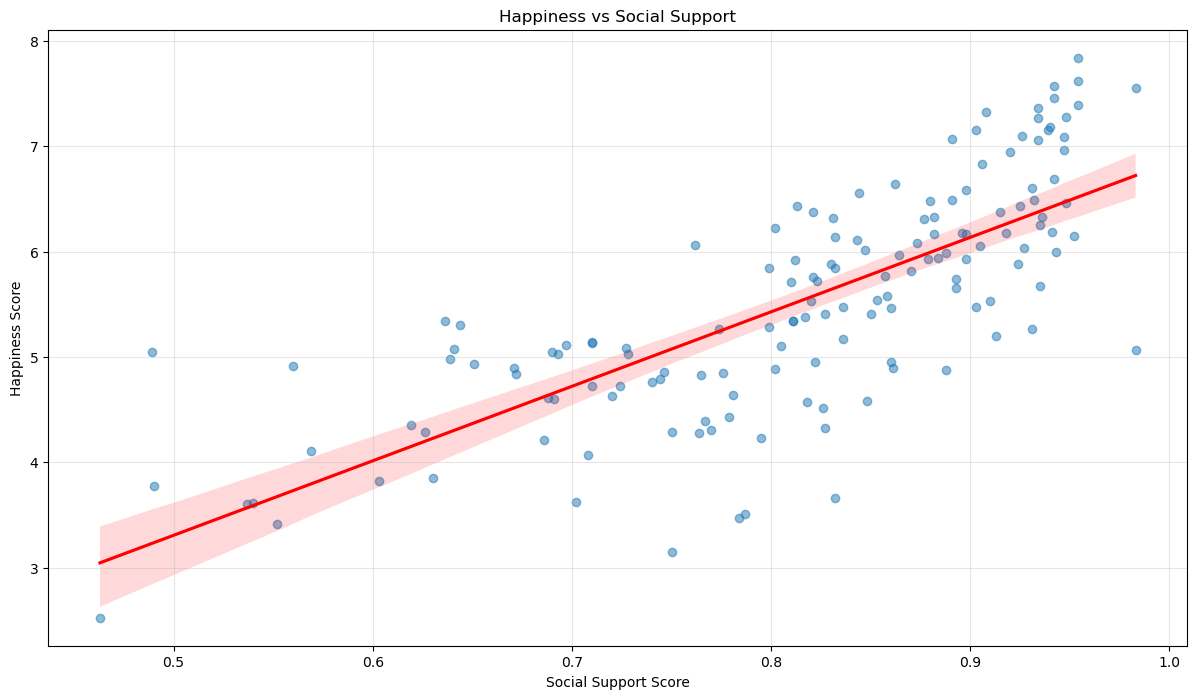

In [151]:
plt.figure(figsize=(14.7, 8))
sns.regplot(data=df, x='social_support', y='ladder_score',
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Happiness vs Social Support')
plt.xlabel('Social Support Score')
plt.ylabel('Happiness Score')
plt.grid(alpha=0.3)
plt.show()

### 4. Violin Plot of Regional Score Distributions
**Rationale:** Violin plots reveal full distribution of happiness by region.
**Expected Insights:** Europe narrow high distribution; others wider variance.

/var/folders/ds/wj6jlh7x2fgggfz75ng92c0m0000gn/T/ipykernel_11227/1918392509.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




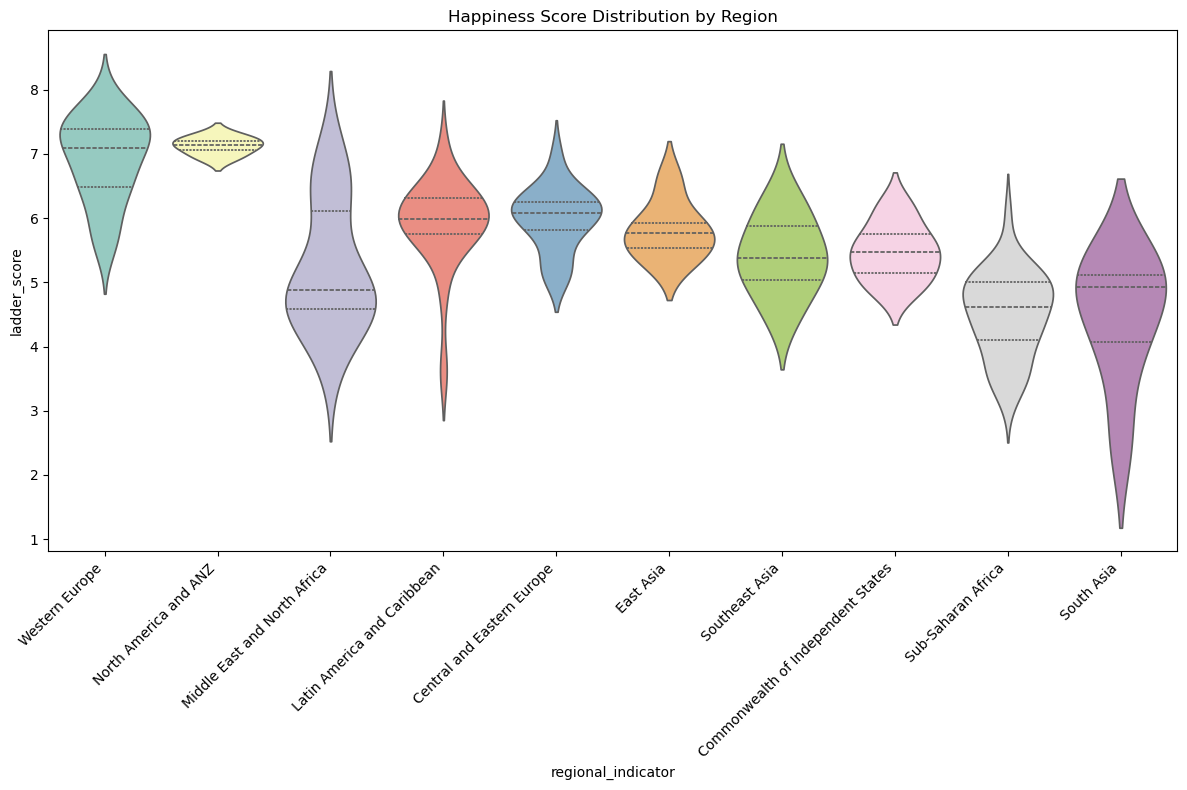

In [152]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='regional_indicator', y='ladder_score', palette='Set3', inner='quartile')
plt.xticks(rotation=45, ha='right')
plt.title('Happiness Score Distribution by Region')
plt.tight_layout()
plt.show()

### 5. Heatmap of Mean Factor Scores by Region
**Rationale:** Condenses six factors across regions into an at-a-glance matrix.
**Expected Insights:** Northern Europe leads in GDP and health; other regions excel in social support.

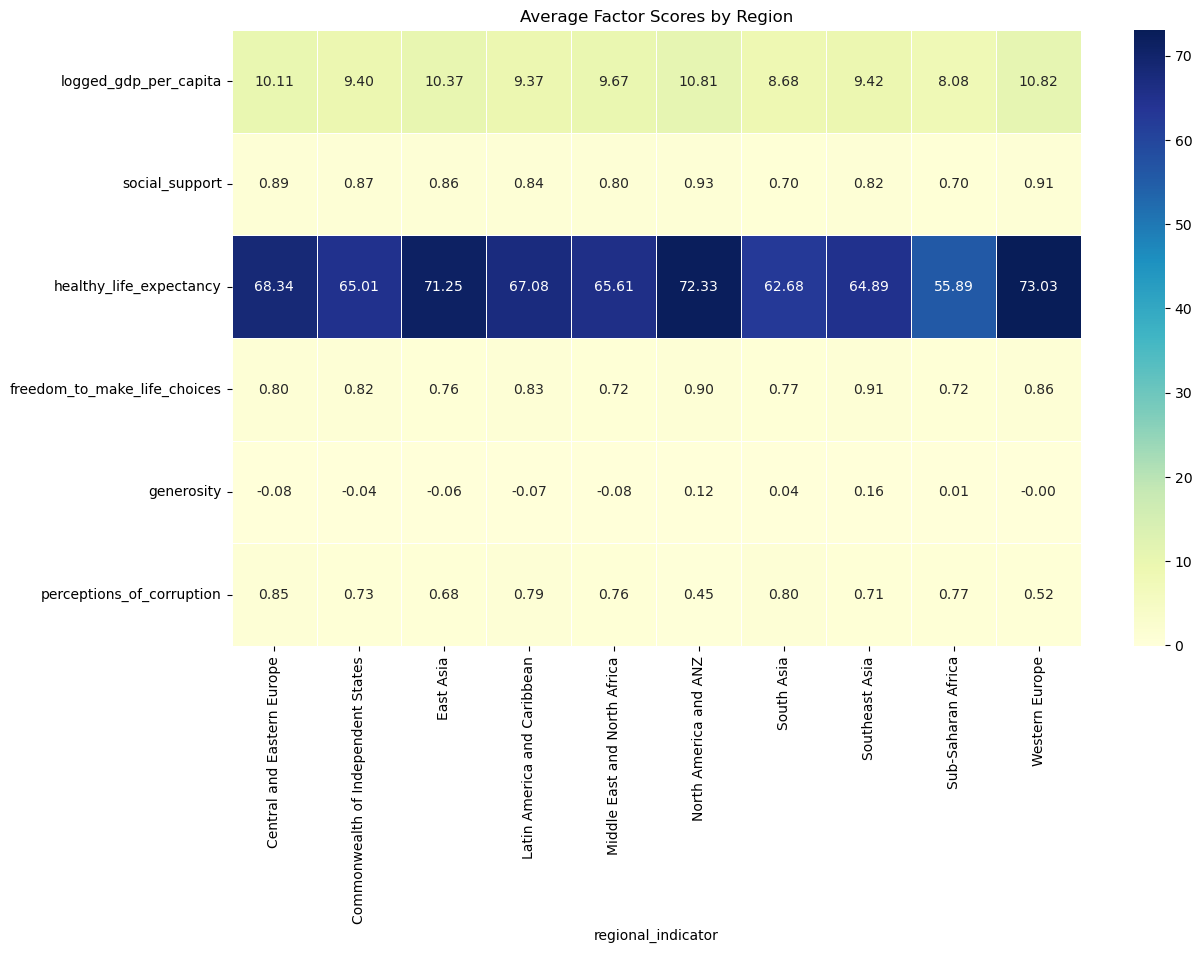

In [153]:
regional_means = df.groupby('regional_indicator')[factors].mean()
plt.figure(figsize=(13.7, 8))
sns.heatmap(regional_means.T, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)
plt.title('Average Factor Scores by Region')
plt.show()

### 6. Bubble Chart: Freedom vs Corruption
**Rationale:** Shows how governance perceptions relate to happiness.
**Expected Insights:** High freedom + low corruption cluster with high happiness.

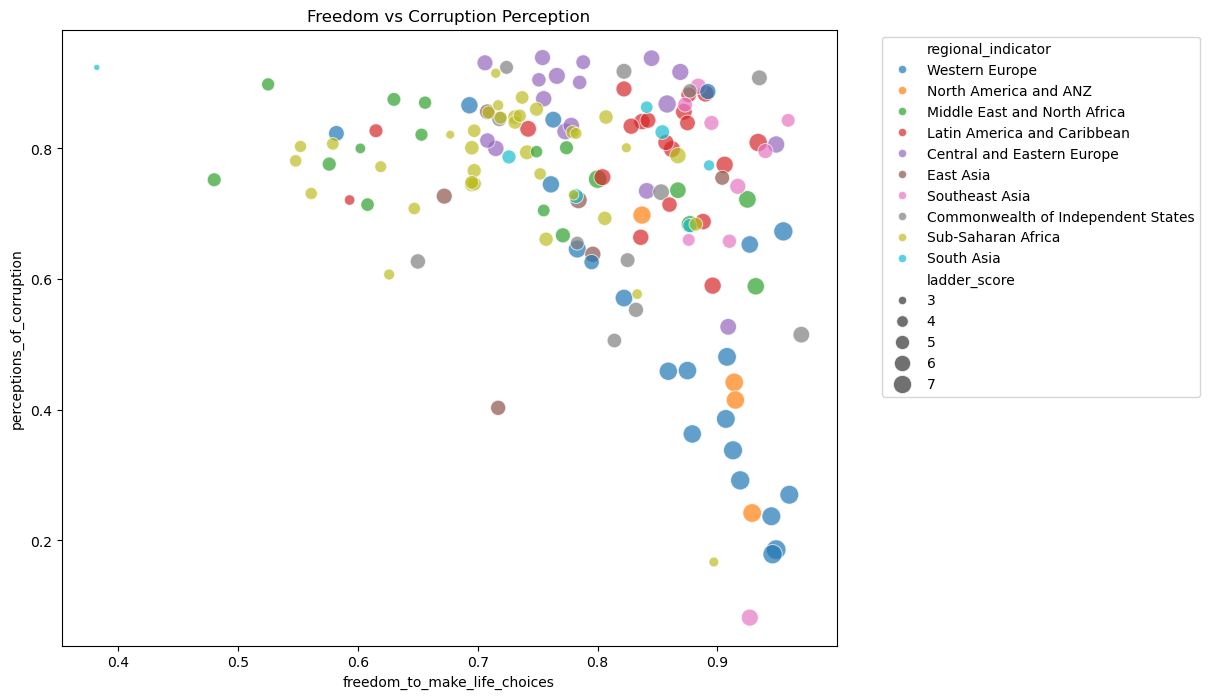

In [154]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='freedom_to_make_life_choices', y='perceptions_of_corruption',
                hue='regional_indicator', size='ladder_score', sizes=(20, 200), alpha=0.7)
plt.title('Freedom vs Corruption Perception')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

### 7. Line Chart: Top-5 Countries’ Happiness Over Time
**Rationale:** Interactive line shows evolution from 2005–2020.
**Expected Insights:** Plateaus or dips corresponding to global events.

In [155]:
top5 = df.nlargest(5, 'ladder_score')['country_name'].tolist()

df_top5 = historical[historical['Country name'].isin(top5)]



fig = px.line(
    df_top5, 
    x='year', 
    y='Life Ladder', 
    color='Country name',
    title='Happiness Trends of Top 5 Countries (2005-2020)',
    labels={'Life Ladder':'Happiness Score'}, line_shape='spline'
)

# Increase the size of the figure
fig.update_layout(
    title_font_size=24,
    title_x=0.5,
    title_y=0.95,
    title_xanchor='center',
    title_yanchor='top',
    width=1200,
    height=800
)

fig.show()

### 8. GDP vs Healthy Life Expectancy
**Rationale:** Scatter tests joint effect of wealth and health on happiness.
**Expected Insights:** Positive cluster at high GDP & expectancy with high happiness.

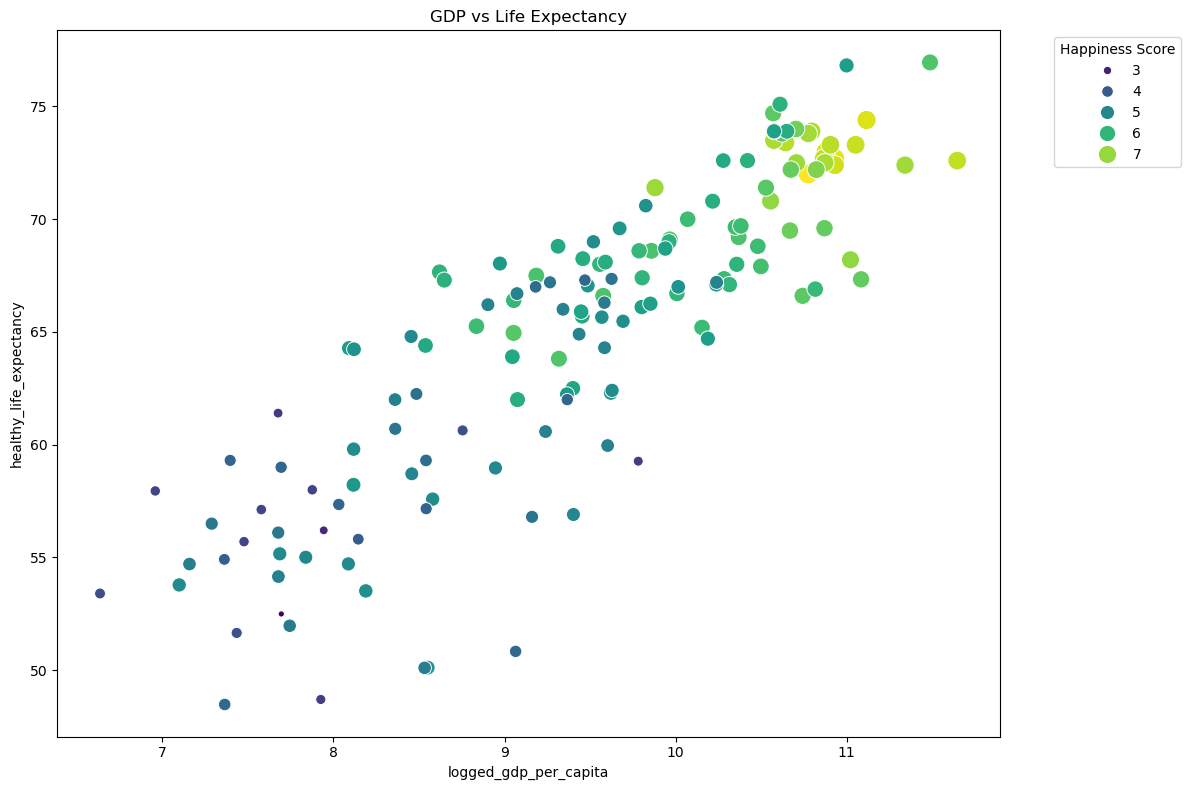

In [156]:
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df, 
    x='logged_gdp_per_capita',
    y='healthy_life_expectancy',
    hue='ladder_score', 
    size='ladder_score', 
    palette='viridis', 
    sizes=(20, 200)
)
scatter.legend(title='Happiness Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('GDP vs Life Expectancy')
plt.tight_layout()
plt.show()

### 9. Parallel Coordinates: Factor Profiles
**Rationale:** Shows how countries trade off multiple factors simultaneously.
**Expected Insights:** Profiles like high-GDP/health vs high-social-support/generosity.

In [157]:
fig = px.parallel_coordinates(
    df, dimensions=factors + ['ladder_score'],                          
    color='ladder_score', 
    color_continuous_scale=px.colors.diverging.Tealrose,
    title='Parallel Analysis of Happiness Factors'
)

# Increase the size of the figure
fig.update_layout(
    title_font_size=24,
    title_x=0.5,
    title_y=0.95,
    title_xanchor='center',
    title_yanchor='top',
    width=1200,
    height=800
)

fig.show()

### 10. Correlation Matrix Heatmap
**Rationale:** Uncovers pairwise linear relationships among all variables.
**Expected Insights:** High positive correlation between GDP, life expectancy, and happiness; negative with corruption.

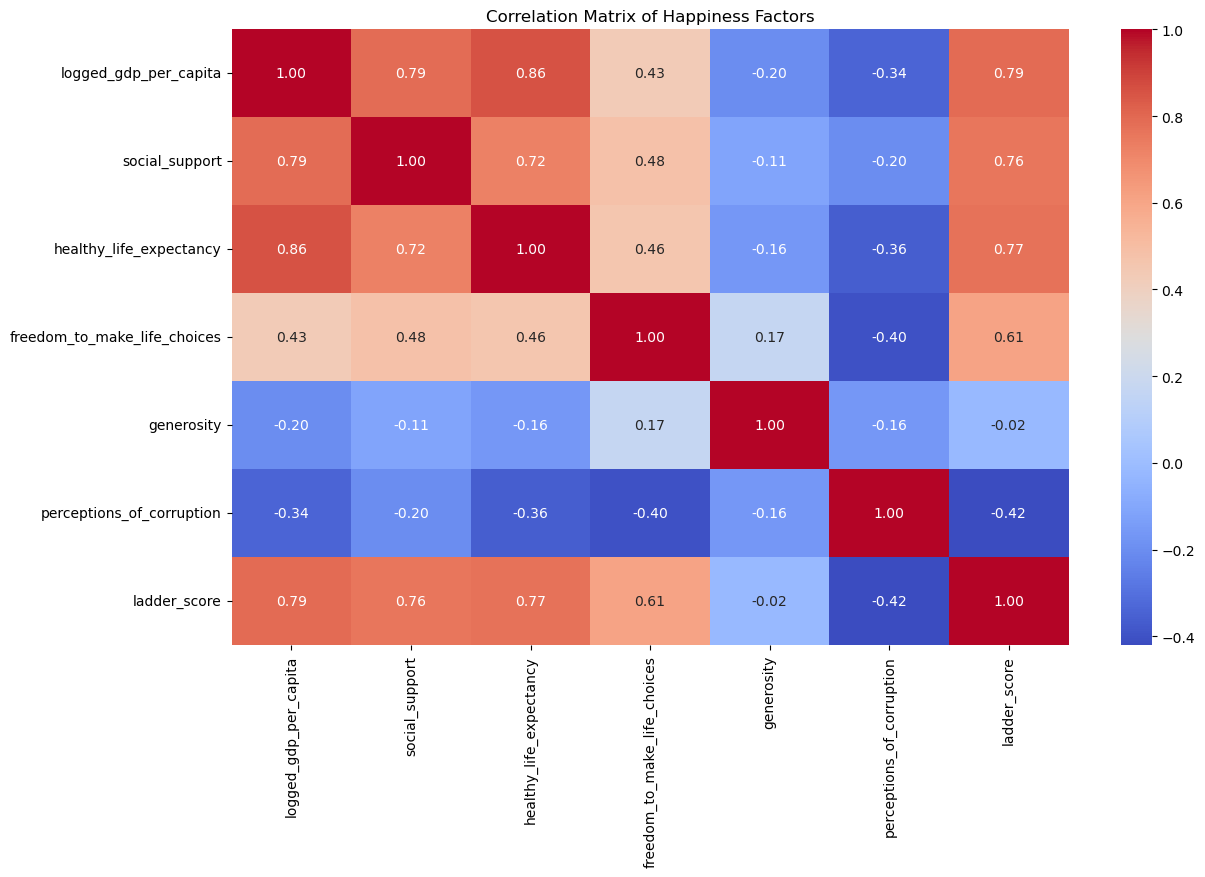

In [158]:
corr = df[factors + ['ladder_score']].corr()
plt.figure(figsize=(13.5, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Happiness Factors')
plt.show()

### 11. Pairplot of Key Factors
**Rationale:** Combines univariate distributions with bivariate scatterplots.
**Expected Insights:** Region-based clusters and detection of non-linear relationships.

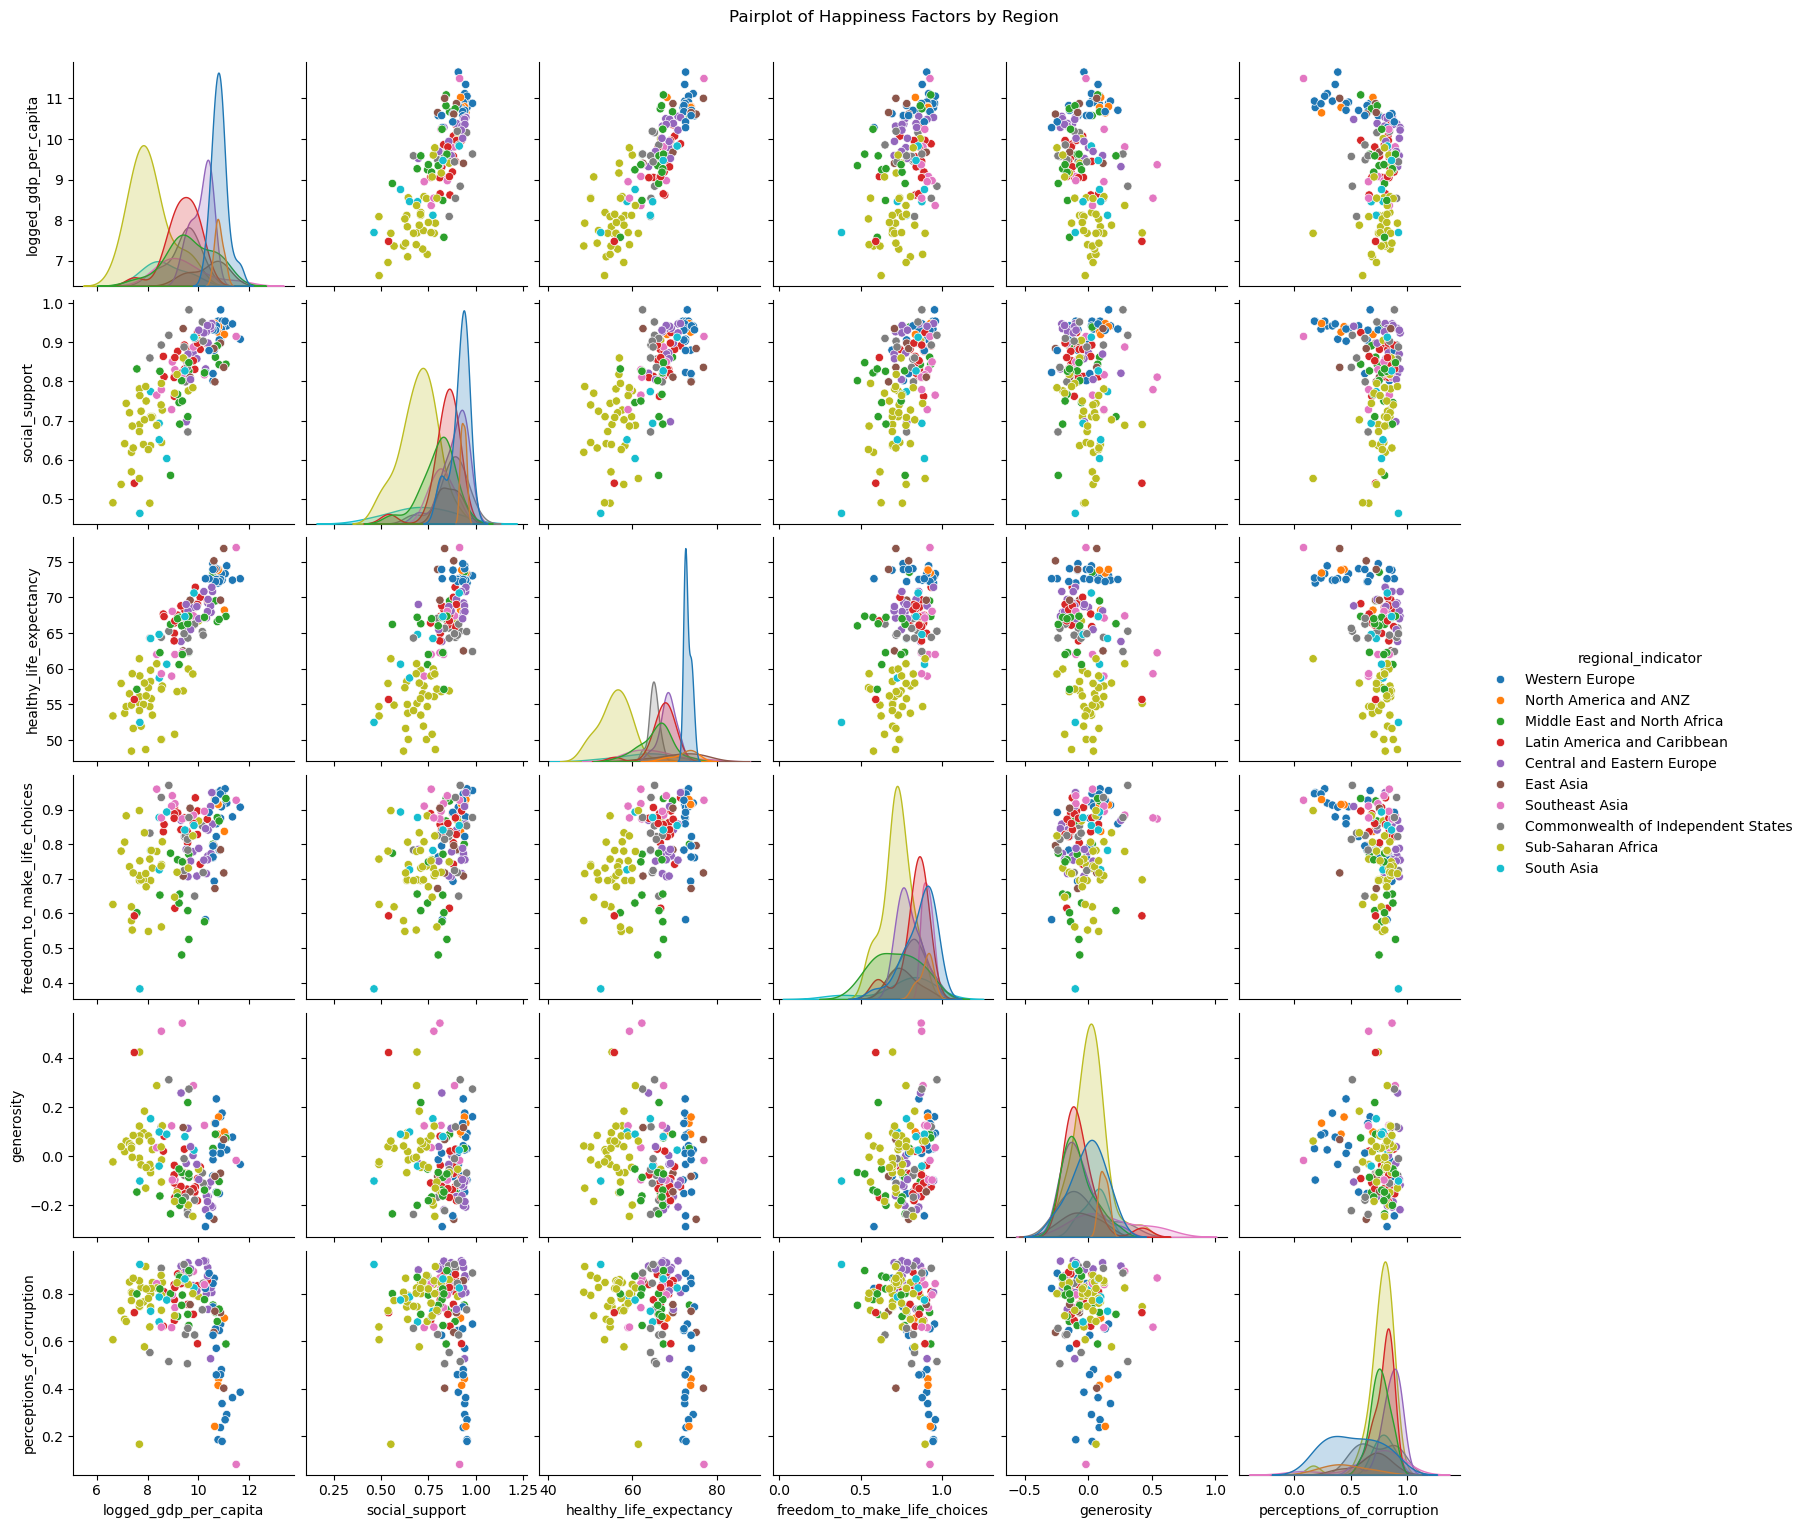

In [159]:
sns.pairplot(df[factors + ['regional_indicator']], hue='regional_indicator', diag_kind='kde')
plt.suptitle('Pairplot of Happiness Factors by Region', y=1.02)
plt.show()

### 12. PCA Biplot of Factor Space
**Rationale:** Reduces factors into key orthogonal axes revealing latent dimensions.
**Expected Insights:** Primary axis contrasting wealth/health vs social factors.

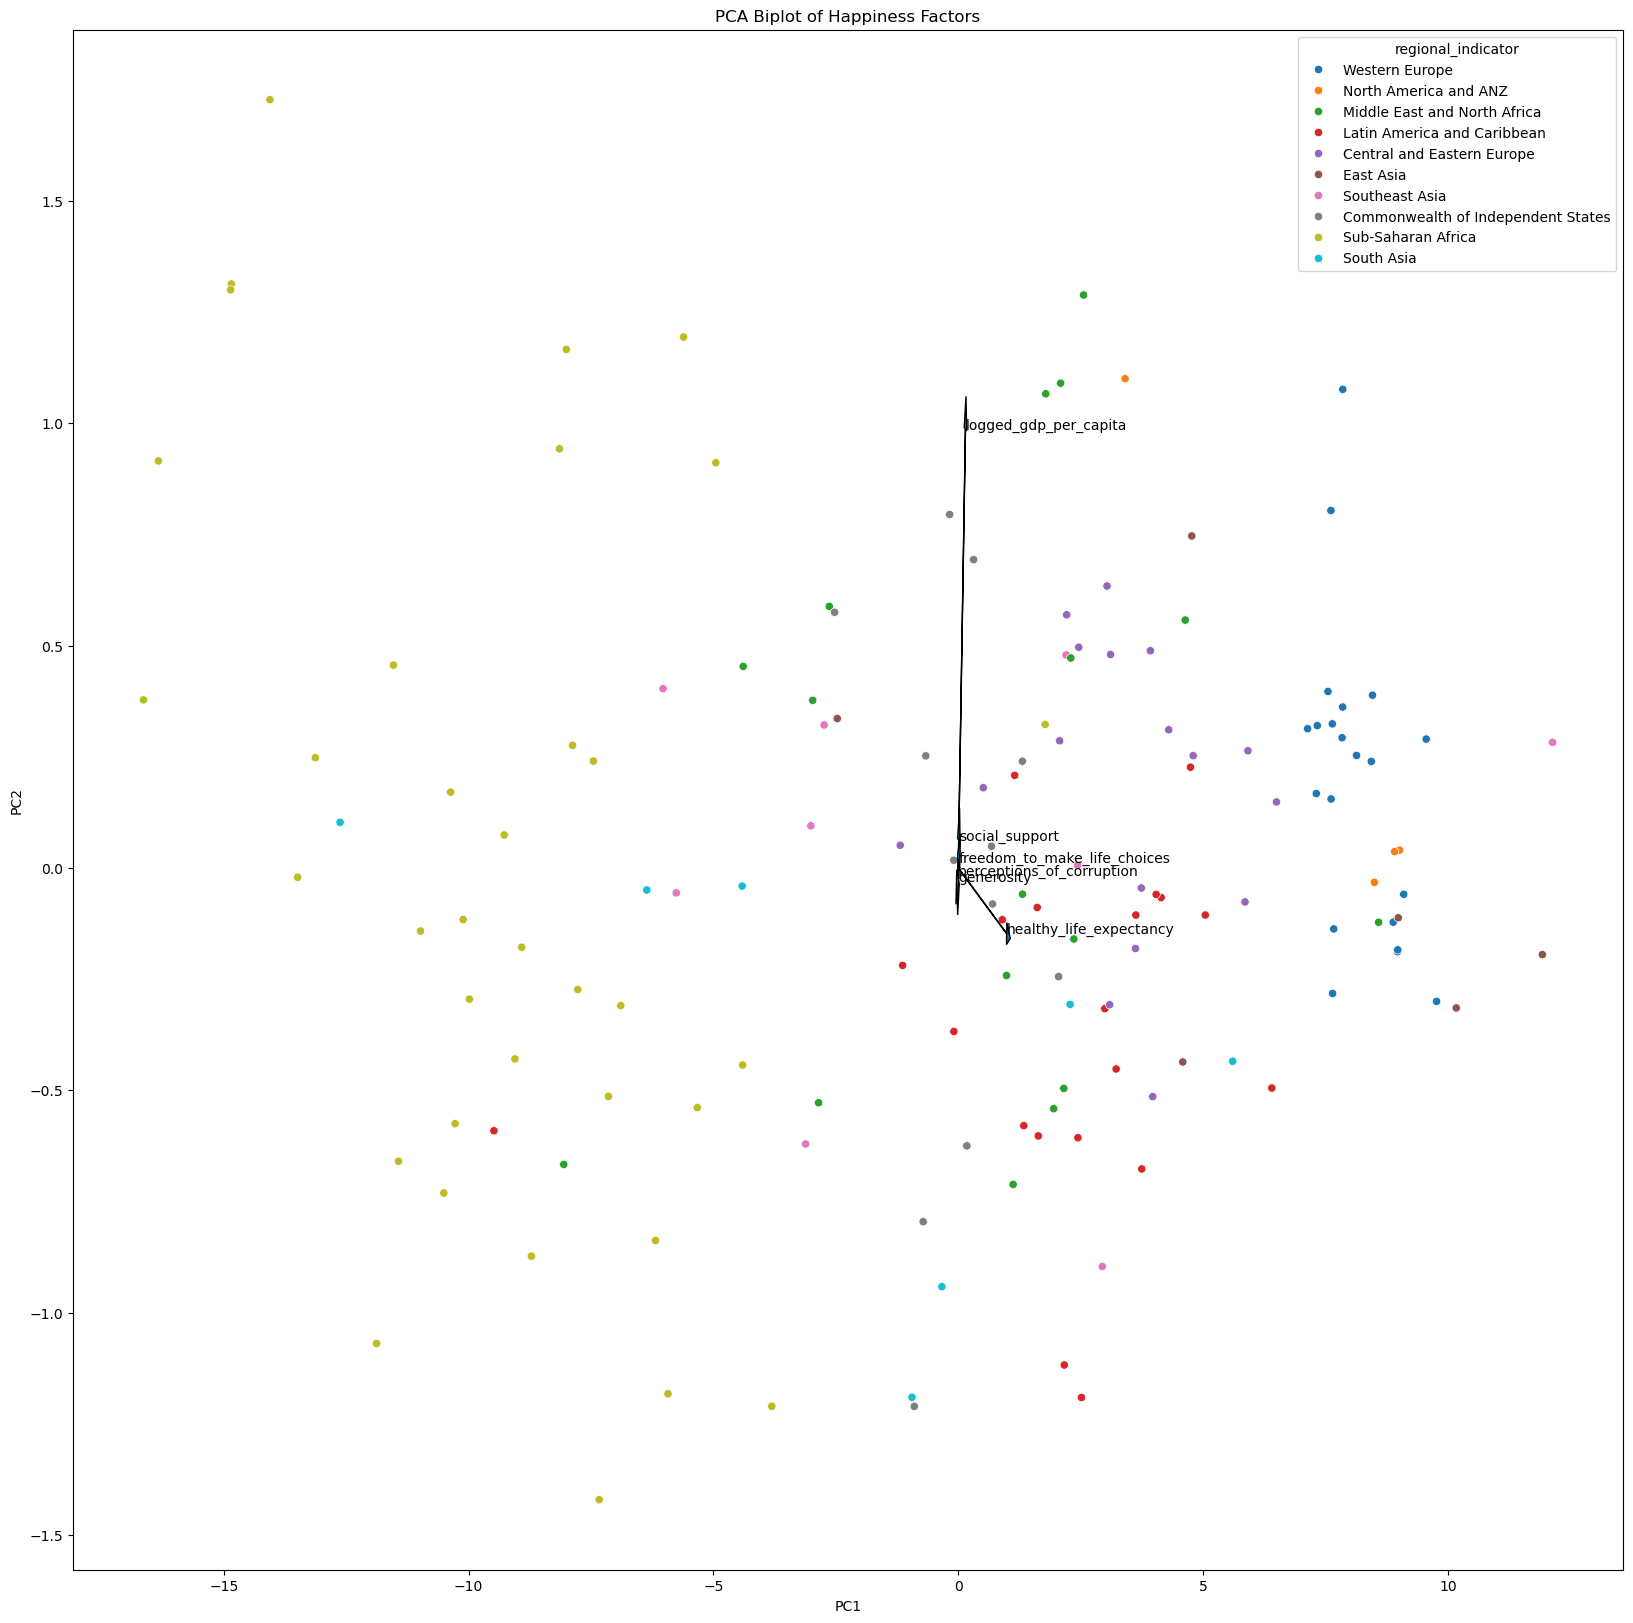

In [160]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(df[factors])
pc_df = pd.DataFrame(components, columns=['PC1','PC2'])
plt.figure(figsize=(20, 20))
sns.scatterplot(x=pc_df['PC1'], y=pc_df['PC2'], hue=df['regional_indicator'])
for i, var in enumerate(factors):
    plt.arrow(0, 0, pca.components_[0,i], pca.components_[1,i], head_width=0.05)
    plt.text(pca.components_[0,i], pca.components_[1,i], var)
plt.title('PCA Biplot of Happiness Factors')
plt.show()

### 13. K-Means Cluster Map of Countries
**Rationale:** Groups countries by similarity across all factors and maps clusters.
**Expected Insights:** Clusters like high-GDP/high-health vs low-all.

In [161]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

df['cluster'] = kmeans.fit_predict(df[factors])

fig = px.choropleth(
    df, 
    locations='country_name', 
    locationmode='country names',
    color='cluster', 
    title='Country Clusters by Happiness Factors'
)

# Increase the size of the figure
fig.update_layout(
    title_font_size=24,
    title_x=0.5,
    title_y=0.95,
    title_xanchor='center',
    title_yanchor='top',
    width=1200,
    height=800
)

fig.show()

### 14. Ridgeline Plot of Ladder Score by Region
**Rationale:** Emphasizes distribution shape differences across regions.
**Expected Insights:** Northern Europe narrow/high; other regions wider/lower.

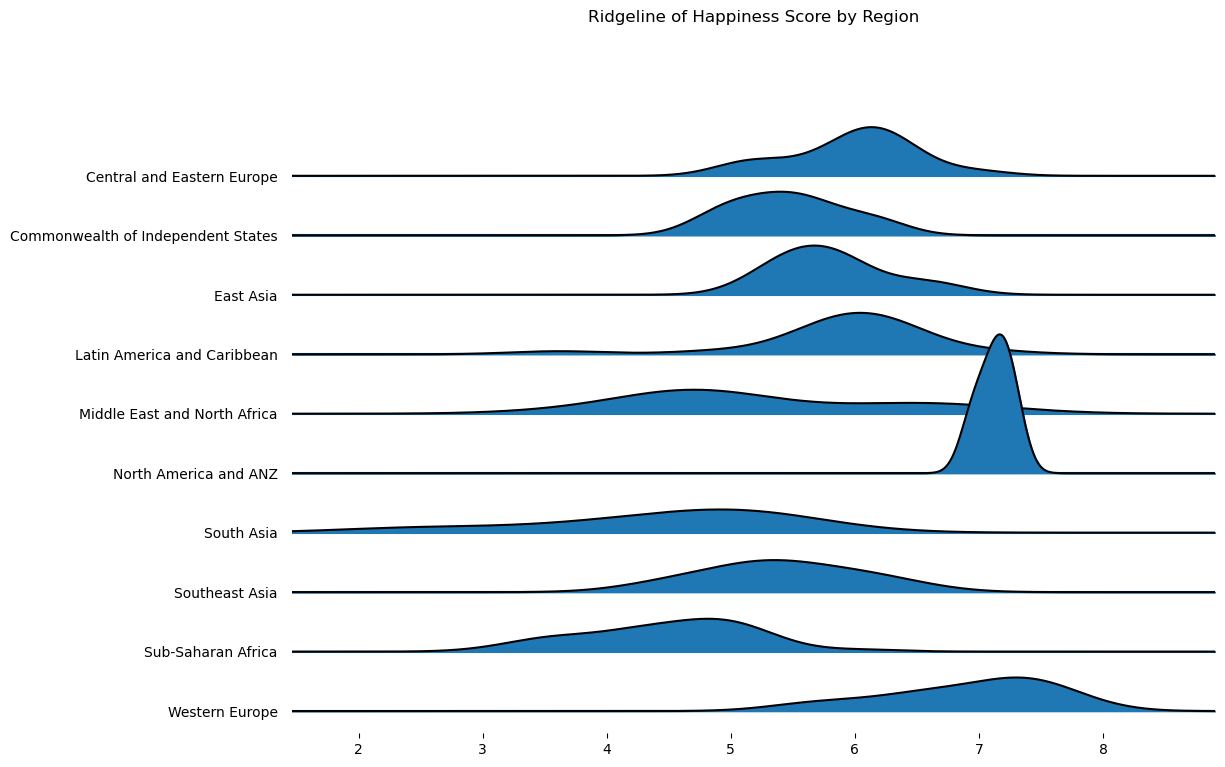

In [162]:
try:
    import joypy
except ModuleNotFoundError:
    !pip install joypy
    import joypy

#plt.figure(figsize=(10, 8))
joypy.joyplot(df, by='regional_indicator', column='ladder_score', overlap=1)
plt.title('Ridgeline of Happiness Score by Region')
plt.gcf().set_size_inches(18, 8)
plt.show()

### 15. Time-Series Decomposition of Global Average Happiness
**Rationale:** Identifies trend vs short-term fluctuations in global happiness.
**Expected Insights:** Overall upward trend with dip around 2020.

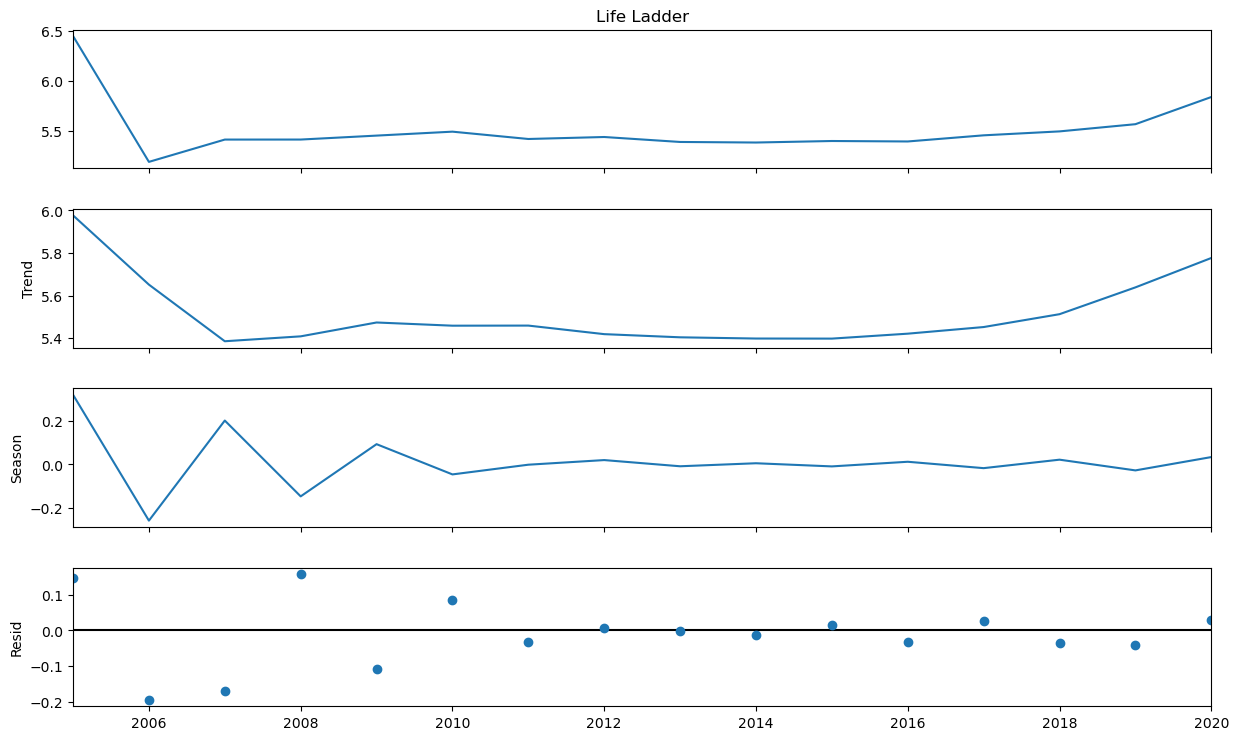

In [163]:
from statsmodels.tsa.seasonal import STL
global_avg = historical.groupby('year')['Life Ladder'].mean()
stl = STL(global_avg, period=2).fit()
stl.plot()
# Increase the size of the figure
plt.gcf().set_size_inches(14, 8)
plt.show()

### 16. Geo Bubble Map: Happiness vs GDP
**Rationale:** Plots circle markers sized by happiness and colored by GDP on a world map.
**Expected Insights:** Visual correlation of wealth and happiness geographically.

In [164]:
fig = px.scatter_geo(
    df, 
    locations='country_name', 
    locationmode='country names',
    size='ladder_score', 
    color='logged_gdp_per_capita',
    title='Geo Bubble: Happiness vs GDP',
    hover_name='country_name',
    color_continuous_scale=px.colors.sequential.Plasma,
    size_max=10
)

# Increase the size of the figure
fig.update_layout(
    title_font_size=24,
    title_x=0.5,
    title_y=0.95,
    title_xanchor='center',
    title_yanchor='top',
    width=1200,
    height=800
)

fig.show()

### 17. Animated Choropleth Over Time
**Rationale:** Shows changes in happiness from 2005 to 2020 via animation.
**Expected Insights:** Temporal shifts in geographic well-being clusters.

In [165]:
# Create a copy of the historical dataset to avoid modifying the original data
hist = historical.copy()

# Standardize column names by converting them to lowercase and replacing spaces with underscores
hist.columns = [c.lower().replace(' ', '_') for c in hist.columns]

# Create an animated choropleth map using Plotly Express
fig = px.choropleth(
    hist,  # DataFrame containing the data
    locations='country_name',  # Column specifying the country names
    locationmode='country names',  # Match country names to geographic locations
    color='life_ladder',  # Column used to determine the color scale
    animation_frame='year',  # Column used to create the animation over time
    title='Animated Happiness Choropleth (2005-2020)'  # Title of the plot
)

# Customize the layout of the figure to increase its size and adjust title positioning
fig.update_layout(
    title_font_size=24,  # Set the font size of the title
    title_x=0.5,  # Center the title horizontally
    title_y=0.95,  # Adjust the vertical position of the title
    title_xanchor='center',  # Anchor the title horizontally at the center
    title_yanchor='top',  # Anchor the title vertically at the top
    width=1200,  # Set the width of the figure
    height=800  # Set the height of the figure
)

# Display the animated choropleth map
fig.show()